In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

WEATHER_GROUPS = {
    0: "Quang đãng",
    1: "Sương mù",
    2: "Mưa nhẹ",
    3: "Mưa",
    4: "Tuyết",
    5: "Mưa Lơn",
    6: "Bão",
}

WEATHER_CODE_MAPPING = {
    0: 0, 1: 0, 2: 0, 3: 0,  
    45: 1, 48: 1,             
    51: 2, 53: 2, 55: 2, 56: 2, 57: 2, 
    61: 3, 63: 3, 65: 3, 66: 3, 67: 3,  
    71: 4, 73: 4, 75: 4, 77: 4,  
    80: 5, 81: 5, 82: 5, 85: 5, 86: 5,  
    95: 6, 96: 6, 99: 6  
}

data = pd.read_csv("load.csv")

data['weather_group'] = data['weather_code'].map(WEATHER_CODE_MAPPING)
data.to_csv('load2.csv')
data.head()


,Unnamed: 0,date,temperature,relative_humidity,dew_point,apparent_temperature,surface_pressure,wind_speed,precipitation,weather_code,cloudcover,weather_group
0,0,2024-01-01 05:00:00+00:00,1.5725,75.5763,-2.2775,-2.1702,1009.8789,8.8548,0.0,3.0,100.0,0
1,1,2024-01-01 06:00:00+00:00,2.5725,74.1006,-1.5775,-1.4437,1009.9020,11.3842,0.0,3.0,100.0,0
2,2,2024-01-01 07:00:00+00:00,2.6725,74.3913,-1.4275,-1.0761,1010.0037,9.6933,0.0,3.0,100.0,0
3,3,2024-01-01 08:00:00+00:00,2.5225,75.7412,-1.3275,-0.9782,1009.8015,8.0900,0.0,2.0,65.0,0
4,4,2024-01-01 09:00:00+00:00,0.4725,88.3674,-1.2275,-2.9309,1009.5552,7.5170,0.0,3.0,91.0,0


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16776.0,8387.500000,4842.958393,0.0000,4193.750000,8387.50000,12581.250000,16775.0000
temperature,16776.0,13.154650,10.098939,-16.8775,5.122500,13.82250,21.272500,40.1725
relative_humidity,16776.0,67.423300,19.012973,15.0983,52.445000,67.88720,83.630900,100.0000
dew_point,16776.0,6.613338,9.940095,-22.2275,-0.527500,7.57250,14.572500,24.5725
apparent_temperature,16776.0,11.456746,12.425795,-21.5116,1.371325,11.75995,21.357675,44.3088
surface_pressure,16776.0,1010.325574,7.695274,976.6310,1005.912250,1010.28060,1015.224125,1042.4696
wind_speed,16776.0,11.172488,6.077164,0.0000,6.725400,10.12010,14.654300,57.2954
precipitation,16776.0,0.138579,0.738134,0.0000,0.000000,0.00000,0.000000,19.8000
weather_code,16776.0,9.236767,19.120101,0.0000,0.000000,2.00000,3.000000,75.0000
cloudcover,16776.0,55.997735,43.502090,0.0000,4.000000,70.00000,100.000000,100.0000


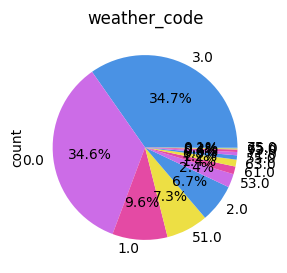

In [3]:
cat_col = [var for var in data.columns if data[var].dtypes =="object"]
cat_col

plt.figure(figsize=(5,3))
plt.title("weather_code")
data["weather_code"].value_counts().plot(kind = 'pie',autopct='%1.1f%%', colors=['#4A92E4','#CC6CE7','#E44AA4','#EDDF44'])
plt.show()

In [4]:
from sklearn.calibration import LabelEncoder


data = data.copy()
encode = LabelEncoder()
for var in cat_col:
    data[var] = encode.fit_transform(data[var])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16776.0,8387.500000,4842.958393,0.0000,4193.750000,8387.50000,12581.250000,16775.0000
date,16776.0,8387.500000,4842.958393,0.0000,4193.750000,8387.50000,12581.250000,16775.0000
temperature,16776.0,13.154650,10.098939,-16.8775,5.122500,13.82250,21.272500,40.1725
relative_humidity,16776.0,67.423300,19.012973,15.0983,52.445000,67.88720,83.630900,100.0000
dew_point,16776.0,6.613338,9.940095,-22.2275,-0.527500,7.57250,14.572500,24.5725
apparent_temperature,16776.0,11.456746,12.425795,-21.5116,1.371325,11.75995,21.357675,44.3088
surface_pressure,16776.0,1010.325574,7.695274,976.6310,1005.912250,1010.28060,1015.224125,1042.4696
wind_speed,16776.0,11.172488,6.077164,0.0000,6.725400,10.12010,14.654300,57.2954
precipitation,16776.0,0.138579,0.738134,0.0000,0.000000,0.00000,0.000000,19.8000
weather_code,16776.0,9.236767,19.120101,0.0000,0.000000,2.00000,3.000000,75.0000


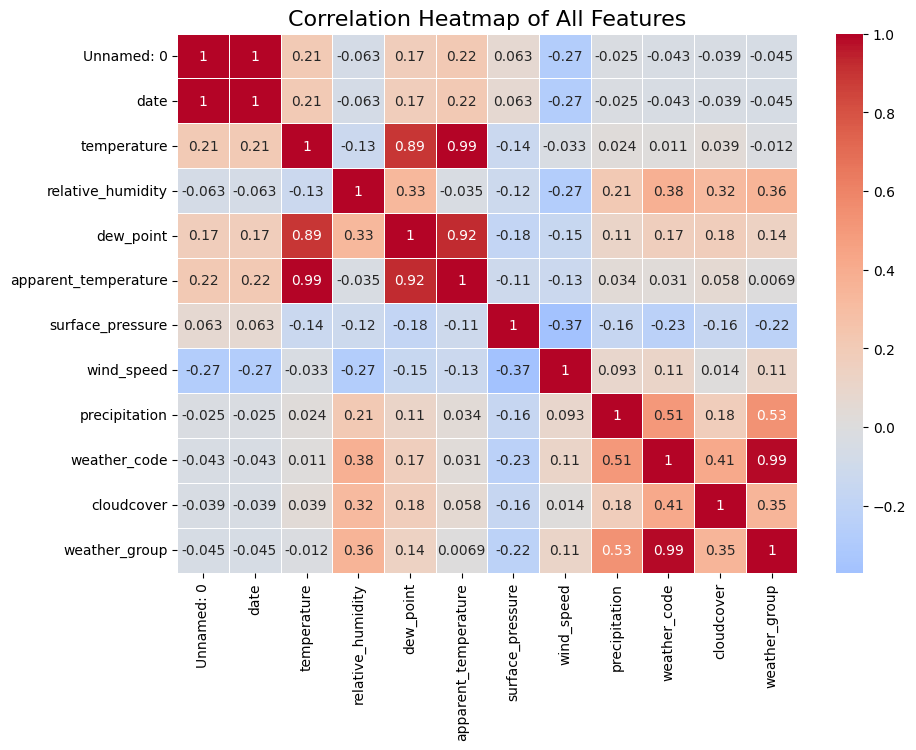

In [5]:

cor_matrix = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

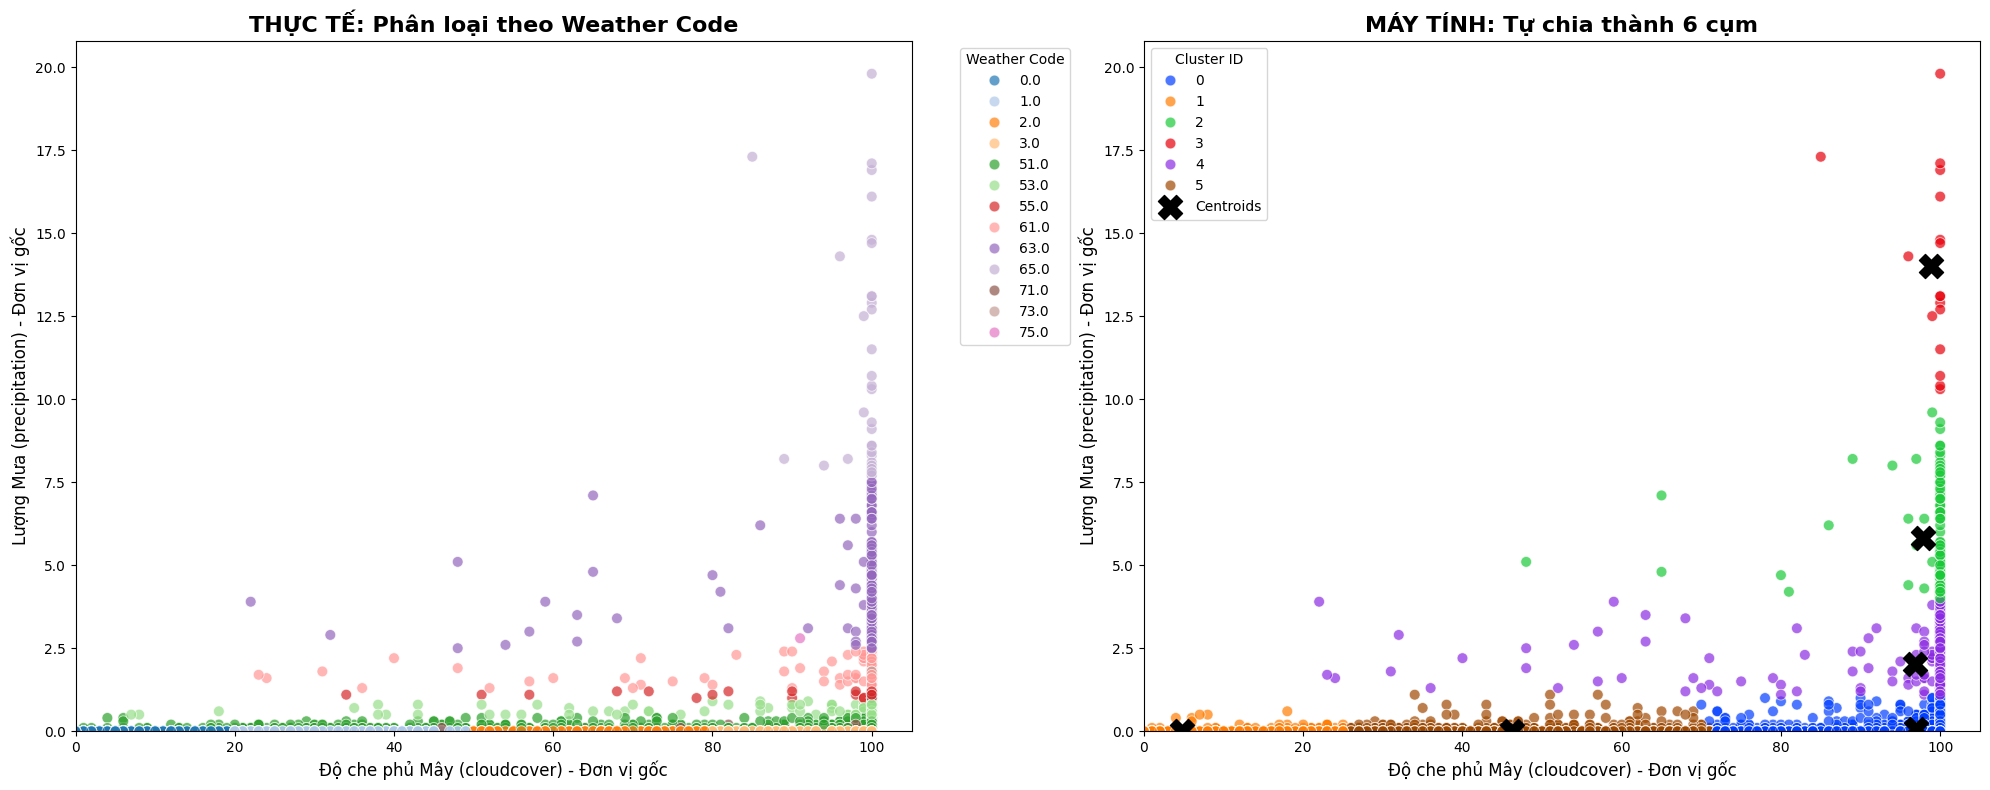

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

min_cloudcover = 0      
min_precipitation = 0   
best_k = 6 

features = ['precipitation', 'cloudcover'] 
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster_calculated'] = kmeans.fit_predict(X_scaled)

centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(
    x='cloudcover', y='precipitation',
    hue='weather_code', 
    palette="tab20", 
    data=data, 
    ax=axes[0],
    s=60, alpha=0.7
)
axes[0].set_title('THỰC TẾ: Phân loại theo Weather Code', fontsize=16, fontweight='bold')

axes[0].set_xlim(min_cloudcover, None) 
axes[0].set_ylim(min_precipitation, None) 

axes[0].set_xlabel('Độ che phủ Mây (cloudcover) - Đơn vị gốc', fontsize=12) 
axes[0].set_ylabel('Lượng Mưa (precipitation) - Đơn vị gốc', fontsize=12) 
axes[0].legend(title='Weather Code', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(
    x='cloudcover', y='precipitation', 
    hue='cluster_calculated', 
    palette="bright", 
    data=data, 
    ax=axes[1],
    s=60, alpha=0.7
)
axes[1].set_title(f'MÁY TÍNH: Tự chia thành {best_k} cụm', fontsize=16, fontweight='bold')

axes[1].set_xlim(min_cloudcover, None) 
axes[1].set_ylim(min_precipitation, None) 

axes[1].set_xlabel('Độ che phủ Mây (cloudcover) - Đơn vị gốc', fontsize=12) 
axes[1].set_ylabel('Lượng Mưa (precipitation) - Đơn vị gốc', fontsize=12) 

axes[1].scatter(
    centers_unscaled[:, 1], 
    centers_unscaled[:, 0], 
    c='black', 
    s=300, 
    marker='X', 
    label='Centroids'
)
axes[1].legend(title='Cluster ID')

plt.tight_layout()
plt.show()

In [ ]:
for cluster_id in sorted(data['cluster_calculated'].unique()):
    subset = data[data['cluster_calculated'] == cluster_id]
    most_common_code = subset['weather_code'].mode()[0]
    
    print(f" Cụm {cluster_id}  ->  Weather Code: {most_common_code}")

 Cụm 0  ->  Weather Code 3.0
 Cụm 1  ->  Weather Code 0.0
 Cụm 2  ->  Weather Code 63.0
 Cụm 3  ->  Weather Code 65.0
 Cụm 4  ->  Weather Code 61.0
 Cụm 5  ->  Weather Code 1.0


In [ ]:
for i, center in enumerate(centers_unscaled):
    mua = center[0]  
    may = center[1]  
    print(f" Cụm {i}: Mưa = {mua:.4f} mm/h  |  Mây = {may:.2f} %")

df_centers = pd.DataFrame(centers_unscaled, columns=features)
df_centers.index.name = 'Cluster ID'
print(df_centers)


   CHI TIẾT TÂM CỤM (CENTROIDS)   
👉 Cụm 0: Mưa = 0.0710 mm/h  |  Mây = 97.02 %
👉 Cụm 1: Mưa = 0.0011 mm/h  |  Mây = 4.82 %
👉 Cụm 2: Mưa = 5.8242 mm/h  |  Mây = 97.86 %
👉 Cụm 3: Mưa = 14.0118 mm/h  |  Mây = 98.82 %
👉 Cụm 4: Mưa = 2.0176 mm/h  |  Mây = 96.87 %
👉 Cụm 5: Mưa = 0.0164 mm/h  |  Mây = 46.26 %

--- BẢNG TỔNG HỢP ---
            precipitation  cloudcover
Cluster ID                           
0                0.070987   97.017505
1                0.001116    4.821616
2                5.824242   97.858586
3               14.011765   98.823529
4                2.017621   96.870044
5                0.016405   46.255083
